In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

### calculate slope || calculate intercept
#### m = (y-b)/x  || b = y - mx

In [4]:
#xs = np.array([1,2,3,4,5,6,7,8,9,10,11,12], dtype=np.float64)
#ys = np.array([4,4,5,5,5,5,6,6,6,7,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

1.958818011257035 -6.271951219512186


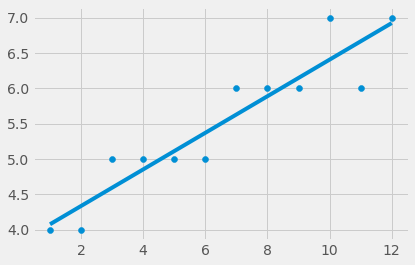

In [48]:
regression_line = [(m*x)+b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

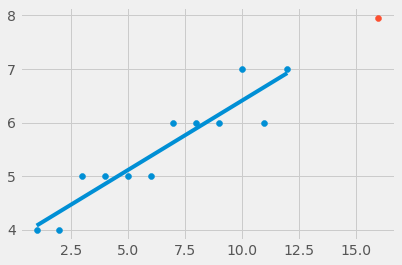

predict_y = 7.95804195804196


In [49]:
predict_x = 16
predict_y = m * predict_x + b
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y)
plt.plot(xs, regression_line)
plt.show()
print(f'predict_y = {predict_y}')

### r^2 error
#### for seeing how good of a fit the line is

In [10]:
# r^2 = 1- (SE ŷ)/(SE ȳ)
# SE squared error
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [51]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.8703115066751431


### test

In [11]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

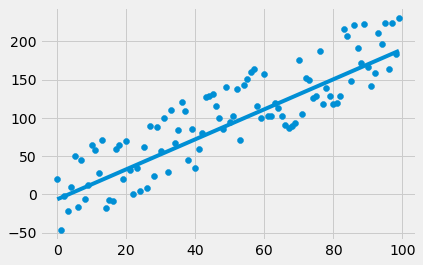

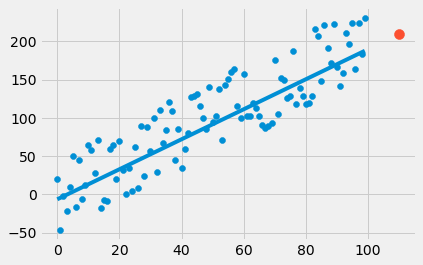

predict_y = 209.19803001876167
0.7479310383509046


In [27]:
xs, ys = create_dataset(100,50, 2, correlation = 'pos')

regression_line = [(m*x)+b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

predict_x = 110
predict_y = m * predict_x + b
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, s=100)
plt.plot(xs, regression_line)
plt.show()
print(f'predict_y = {predict_y}')

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)